In [1]:
import cv2                          # Main OpenCV library 
import numpy as np                  # For array operations 
import matplotlib.pyplot as plt 

In [7]:
def load_and_prepare_image(image_path):
    """
    Load color image and convert to grayscale.
    """
    img = cv2.imread("/Users/meghanshimathur/Desktop/AIDTM/CV/acquired_image.jpg")
    img_color = cv2.imread(image_path)
    if img_color is None:
        raise FileNotFoundError(f"Cannot load image: {image_path}")

    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    return img_color, img_gray

In [8]:
def detect_and_compute_sift(gray_img):
    """
    Detect keypoints and compute SIFT descriptors.
    """
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_img, None)
    return keypoints, descriptors

In [9]:
def match_features_sift(desc1, desc2, ratio=0.75):
    """
    Match SIFT features using BFMatcher + Lowe's Ratio Test.
    """
    bf = cv2.BFMatcher(cv2.NORM_L2)
    matches = bf.knnMatch(desc1, desc2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < ratio * n.distance:
            good_matches.append(m)

    return good_matches

In [10]:
def draw_feature_matches(img1, kp1, img2, kp2, matches):
    """
    Visualize feature matches.
    """
    matched_img = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        matches, None,
        flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
    )

    plt.figure(figsize=(14, 8))
    plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

Images loaded successfully
Image1 shape: (757, 800)
Image2 shape: (696, 800)
Keypoints found: 4782 4754
Good matches: 365


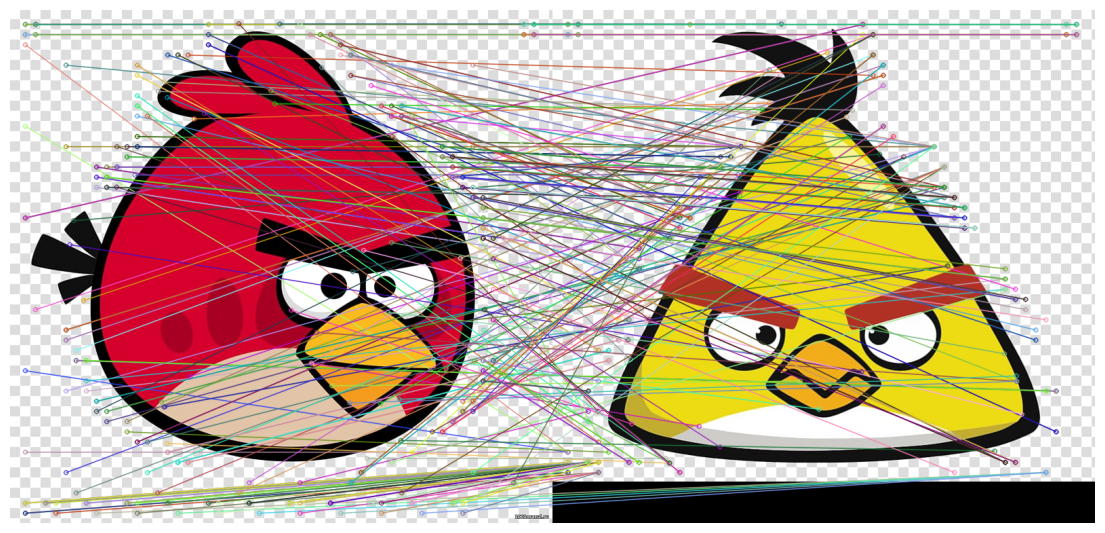

In [11]:
image_path_1 = r"C:\Users\Heril Shah\Desktop\AIDTM\Trimester 3\Computer Vision using Python\angry_bird.jpg"
image_path_2 = r"C:\Users\Heril Shah\Desktop\AIDTM\Trimester 3\Computer Vision using Python\y_angry_bird.jpg"

# Load images
color1, gray1 = load_and_prepare_image(image_path_1)
color2, gray2 = load_and_prepare_image(image_path_2)

print("Images loaded successfully")
print("Image1 shape:", gray1.shape)
print("Image2 shape:", gray2.shape)

# Detect SIFT features
kp1, des1 = detect_and_compute_sift(gray1)
kp2, des2 = detect_and_compute_sift(gray2)

print("Keypoints found:", len(kp1), len(kp2))

# Safety check
if des1 is None or des2 is None:
    print("Descriptors not found")
else:
    # Match features
    good_matches = match_features_sift(des1, des2)

    print("Good matches:", len(good_matches))

    # Draw matches
    draw_feature_matches(color1, kp1, color2, kp2, good_matches)